## this script has the following
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

## import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geopandas as gpd

In [2]:
%matplotlib inline

In [3]:
NA_geo= r'C:\Users\lecce\OneDrive\CitiBike\map'

In [4]:
na_geo = gpd.read_file(r'C:\Users\lecce\OneDrive\CitiBike\custom.geo.json')

In [9]:
print(na_geo.head())
print(na_geo.columns)

        featurecla  scalerank  labelrank          sovereignt sov_a3  adm0_dif  \
0  Admin-0 country          1          5          Costa Rica    CRI         0   
1  Admin-0 country          1          5           Nicaragua    NIC         0   
2  Admin-0 country          1          5               Haiti    HTI         0   
3  Admin-0 country          1          5  Dominican Republic    DOM         0   
4  Admin-0 country          1          6         El Salvador    SLV         0   

   level               type tlc               admin  ... fclass_id  fclass_pl  \
0      2  Sovereign country   1          Costa Rica  ...      None       None   
1      2  Sovereign country   1           Nicaragua  ...      None       None   
2      2  Sovereign country   1               Haiti  ...      None       None   
3      2  Sovereign country   1  Dominican Republic  ...      None       None   
4      2  Sovereign country   1         El Salvador  ...      None       None   

  fclass_gr fclass_it  fcl

In [11]:
path = "C:\\Users\\lecce\\OneDrive\\CitiBike"

In [13]:
citi2 = pd.read_csv(os.path.join(r"C:\Users\lecce\OneDrive\CitiBike\citibike_edit.csv"))

In [15]:
#city JSON

city_geo_2= r'C:\Users\shrav\_Data_Analysis_CF\Citi_bikes_project\02 Data\nyc-zip-code-tabulation-areas-polygons.geojson'

In [17]:
citi2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,trip_time_min,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,16.55,16.550000,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581.00,9.683333,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361.00,6.016667,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561.00,9.350000,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296.00,38.266667,Non-Subscriber,NaN,0


In [17]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_4.csv'), index_col = False)

NameError: name 'path' is not defined

In [19]:
citi2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,trip_time_min,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,16.55,16.550000,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581.00,9.683333,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361.00,6.016667,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561.00,9.350000,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296.00,38.266667,Non-Subscriber,NaN,0


In [21]:
station_counts = citi2.groupby('start_station_id')['end_time'].count().reset_index()

In [23]:
#how many rides occured at that station
station_counts

,start_station_id,end_time
0,72,161
1,79,139
2,82,71
3,83,83
4,116,301
...,...,...
325,2017,110
326,2021,181
327,2022,99
328,2023,81


In [25]:
#how many rides happened each day at each station
station_counts_day = citi2.groupby(['start_station_id', 'weekday'])['start_time'].count()

In [27]:
station_counts_day

start_station_id  weekday
72                Fri        32
                  Mon        23
                  Sat        24
                  Sun        26
                  Thu        21
                             ..
3002              Sat        52
                  Sun        52
                  Thu        24
                  Tue        29
                  Wed        40
Name: start_time, Length: 2288, dtype: int64

In [29]:
station_counts_day.head(20)

start_station_id  weekday
72                Fri        32
                  Mon        23
                  Sat        24
                  Sun        26
                  Thu        21
                  Tue        16
                  Wed        19
79                Fri        23
                  Mon        16
                  Sat        21
                  Sun        13
                  Thu        26
                  Tue        18
                  Wed        22
82                Fri         9
                  Mon        14
                  Sat         7
                  Sun        15
                  Thu         7
                  Tue         9
Name: start_time, dtype: int64

In [31]:
station_counts.head(50)

,start_station_id,end_time
0,72,161
1,79,139
2,82,71
3,83,83
4,116,301
5,119,11
6,120,31
7,127,283
8,128,288
9,137,98


In [33]:
station_counts.max()

start_station_id    3002
end_time             536
dtype: int64

In [35]:
station_counts.min()

start_station_id    72
end_time             5
dtype: int64

In [37]:
station_counts.mean()

start_station_id    447.809091
end_time            151.515152
dtype: float64

<Axes: ylabel='Count'>

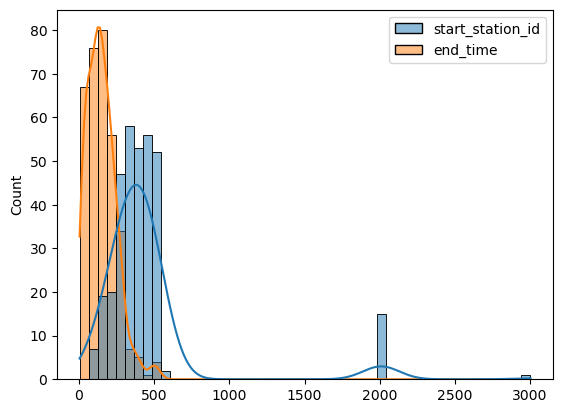

In [39]:
#looking into station counts
sns.histplot(station_counts, bins=50, kde = True)

In [71]:
# select only needed columns
columns = ["weekday","start_hour","start_station_id","start_station_longitude","start_station_latitude"]

In [41]:
citi2 = citi2[columns]

NameError: name 'columns' is not defined

In [43]:
citi2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,trip_time_min,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,16.55,16.550000,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581.00,9.683333,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361.00,6.016667,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561.00,9.350000,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296.00,38.266667,Non-Subscriber,NaN,0


In [45]:
type(citi2)

pandas.core.frame.DataFrame

In [47]:
citi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [49]:
# Check for missing values

citi2.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
trip_time_min                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [75]:
# Define data types for specific columns
data_types = {
    'start_time': 'datetime64'
}

In [77]:
file_path = os.path.join('C:', 'Users', 'lecce', 'OneDrive', 'CitiBike', 'citbike_edit.csv')

In [55]:
print(file_path)

C:Users\lecce\OneDrive\CitiBike\citbike_edit.csv


In [79]:
parse_dates = ['ride_start_date']

In [81]:
citi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [87]:
citi2['start_time'] = pd.to_datetime(citi2['start_time'], errors='coerce')

In [89]:
station_daily_counts = citi2.groupby(['start_station_id', citi2['start_time'].dt.date])['start_time'].count()

In [91]:
# Calculate rides per day for each station
station_daily_counts = citi2.groupby(['start_station_id', citi2['start_time'].dt.date])['start_time'].count()

In [93]:
#rides taken each day at each station
station_daily_counts

start_station_id  start_time
72                2013-09-01     1
                  2013-09-02     3
                  2013-09-03     1
                  2013-09-04     4
                  2013-09-05     8
                                ..
3002              2013-09-26     9
                  2013-09-27     7
                  2013-09-28    17
                  2013-09-29    10
                  2013-09-30     6
Name: start_time, Length: 8952, dtype: int64

In [34]:
station_daily_counts.head(35)

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06         10
                  2013-09-07          6
                  2013-09-08          7
                  2013-09-09          5
                  2013-09-10          7
                  2013-09-11          7
                  2013-09-12          7
                  2013-09-13          7
                  2013-09-14          7
                  2013-09-15          8
                  2013-09-16          4
                  2013-09-17          4
                  2013-09-19          1
                  2013-09-20          6
                  2013-09-21          5
                  2013-09-22          5
                  2013-09-23          6
                  2013-09-24          4
                  2013-09-25          8
                  2013-09-26          5
      

In [95]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()


In [97]:
#checking code
station_avg_rides_per_day

,start_station_id,start_time
0,72,5.551724
1,79,4.964286
2,82,2.448276
3,83,2.964286
4,116,10.033333
...,...,...
325,2017,3.666667
326,2021,6.033333
327,2022,3.413793
328,2023,3.240000


In [99]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'ride_start_date':'average_daily_rides'})

In [101]:
#merging data sets
citi_1.head()

NameError: name 'citi_1' is not defined

In [103]:
station_avg_rides_per_day.head()

,start_station_id,start_time
0,72,5.551724
1,79,4.964286
2,82,2.448276
3,83,2.964286
4,116,10.033333


In [105]:
station_avg_rides_per_day.shape

(330, 2)

In [107]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

In [111]:
# lat and long for each station
station_loc = citi2.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()

In [113]:
station_loc

,start_station_latitude,start_station_longitude
start_station_id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497
...,...,...
2017,40.750224,-73.971214
2021,40.759291,-73.988597
2022,40.758491,-73.959206


In [115]:
# each station with lat and longitude and avg daily rides
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [117]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,start_time
0,72,40.767272,-73.993929,5.551724
1,79,40.719116,-74.006667,4.964286
2,82,40.711174,-74.000165,2.448276
3,83,40.683826,-73.976323,2.964286
4,116,40.741776,-74.001497,10.033333
...,...,...,...,...
325,2017,40.750224,-73.971214,3.666667
326,2021,40.759291,-73.988597,6.033333
327,2022,40.758491,-73.959206,3.413793
328,2023,40.759681,-73.970314,3.240000


In [121]:
df_merged = df_merged.rename(columns={'start_time': 'average_daily_rides'})

In [123]:
data_to_plot = df_merged[['start_station_id', 'average_daily_rides']]
data_to_plot.head()

,start_station_id,average_daily_rides
0,72,5.551724
1,79,4.964286
2,82,2.448276
3,83,2.964286
4,116,10.033333


In [125]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.551724
1,-74.006667,40.719116,4.964286
2,-74.000165,40.711174,2.448276
3,-73.976323,40.683826,2.964286
4,-74.001497,40.741776,10.033333


In [127]:
df_merged['average_daily_rides'].max()

17.866666666666667

In [129]:
df_merged['average_daily_rides'].mean()

5.265386626628997

<Axes: xlabel='average_daily_rides', ylabel='Count'>

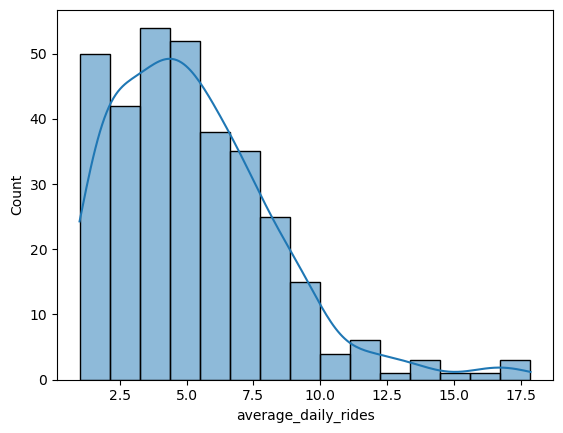

In [131]:
#AVG DAILY RIDES BINS
sns.histplot(df_merged['average_daily_rides'], bins=15, kde = True)

In [51]:
nyc_map

In [161]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [163]:
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.551724
1,-74.006667,40.719116,4.964286
2,-74.000165,40.711174,2.448276
3,-73.976323,40.683826,2.964286
4,-74.001497,40.741776,10.033333


In [165]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [167]:
data_to_plot_2.head()

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776


In [240]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [169]:
# trying to get a NYC map imported and the lat and long of the zip codes
import folium
from folium.plugins import MarkerCluster

In [171]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [173]:
choropleth_layer = folium.Choropleth(
    geo_data=na_geo,
    name="Choropleth Map"
).add_to(map_zip)

In [175]:
folium.LayerControl().add_to(map_zip)

In [177]:
map_zip

In [179]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.551724
1,79,40.719116,-74.006667,4.964286
2,82,40.711174,-74.000165,2.448276
3,83,40.683826,-73.976323,2.964286
4,116,40.741776,-74.001497,10.033333
...,...,...,...,...
325,2017,40.750224,-73.971214,3.666667
326,2021,40.759291,-73.988597,6.033333
327,2022,40.758491,-73.959206,3.413793
328,2023,40.759681,-73.970314,3.240000


In [181]:
df_merged.to_csv(os.path.join(path, 'bike_station.csv'))

In [183]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="lightgreen", icon="bicycle")
    ).add_to(map_zip)

In [185]:
# Add a layer control
folium.LayerControl().add_to(map_zip)

In [187]:
map_zip

In [398]:
import geopandas as gpd

# Assuming 'map_zip' is your GeoDataFrame
map_zip = gpd.read_file(r'C:\Users\lecce\OneDrive\CitiBike\bike_station.geojson')

In [400]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [402]:
area_geojson = r'C:\Users\lecce\OneDrive\CitiBike\bike_station.geojson'

In [404]:
import geopandas as gpd
area_geojson = gpd.read_file(area_geojson, engine='pyogrio')

In [406]:
file_path = r"C:\Users\lecce\OneDrive\CitiBike\bike_station.csv"
df = pd.read_csv(file_path)

In [408]:
geojson_file = r'C:\Users\lecce\OneDrive\CitiBike\nyco-zipcodes.geojson'

In [410]:
nyc_zipcodes_gdf = gpd.read_file(geojson_file)

In [412]:
df['geometry'] = df.apply(lambda row: Point(row['start_station_longitude'], row['start_station_latitude']), axis=1)

In [414]:
geojson_gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [416]:
print(nyc_zipcodes_gdf.columns)
print(geojson_gdf.columns)

Index(['zcta', 'borough', 'neighborhoods', 'community_districts', 'puma_code',
       'county_fp', 'state_fp', 'pop_zcta_puma', 'pop_zcta', 'pop_puma',
       'percent_zcta_puma', 'percent_puma_zcta', 'area_land', 'area_water',
       'internal_lat', 'internal_lon', 'nycgov_cd_pov_rate',
       'census_total_pov', 'census_total_pop', 'census_pov_rate',
       'census_cd_pov_rate', 'geometry'],
      dtype='object')
Index(['Unnamed: 0', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'average_daily_rides', 'geometry'],
      dtype='object')


In [418]:
nyc_zipcodes_gdf.rename(columns={'zcta': 'start_station_id'}, inplace=True)

In [420]:
print(nyc_zipcodes_gdf.crs)  # CRS of the first GeoDataFrame
print(merged_gdf.crs)  # CRS of the second GeoDataFrame

EPSG:4269
None


In [422]:
if merged_gdf.crs is None:
    merged_gdf.set_crs(nyc_zipcodes_gdf.crs, allow_override=True, inplace=True)

In [424]:
merged_gdf = merged_gdf.to_crs(nyc_zipcodes_gdf.crs)

In [426]:
# If merged_gdf does not have a CRS, set it to the same CRS as nyc_zipcodes_gdf
if merged_gdf.crs is None:
    merged_gdf.set_crs(nyc_zipcodes_gdf.crs, allow_override=True, inplace=True)

# If they have different CRS, reproject merged_gdf to match nyc_zipcodes_gdf
merged_gdf = merged_gdf.to_crs(nyc_zipcodes_gdf.crs)

# Rename columns if 'index_left' or 'index_right' exist in either GeoDataFrame
if 'index_left' in nyc_zipcodes_gdf.columns:
    nyc_zipcodes_gdf.rename(columns={'index_left': 'index_left_rename'}, inplace=True)

if 'index_right' in merged_gdf.columns:
    merged_gdf.rename(columns={'index_right': 'index_right_rename'}, inplace=True)

# Perform the spatial join
merged_gdf = gpd.sjoin(nyc_zipcodes_gdf, merged_gdf, how='inner', op='intersects')

# Check the merged result
print(merged_gdf.head())

C:\Users\lecce\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


MergeError: Passing 'suffixes' which cause duplicate columns {'start_station_id_right'} is not allowed.

In [428]:
print(nyc_zipcodes_gdf.columns)

Index(['start_station_id', 'borough', 'neighborhoods', 'community_districts',
       'puma_code', 'county_fp', 'state_fp', 'pop_zcta_puma', 'pop_zcta',
       'pop_puma', 'percent_zcta_puma', 'percent_puma_zcta', 'area_land',
       'area_water', 'internal_lat', 'internal_lon', 'nycgov_cd_pov_rate',
       'census_total_pov', 'census_total_pop', 'census_pov_rate',
       'census_cd_pov_rate', 'geometry'],
      dtype='object')


In [430]:
print(merged_gdf.head()) 

   start_station_id  start_station_latitude  start_station_longitude  \
0                72               40.767272               -73.993929   
1                79               40.719116               -74.006667   
2                82               40.711174               -74.000165   
3                83               40.683826               -73.976323   
4               116               40.741776               -74.001497   

   average_daily_rides                    geometry  start_station_id_right  \
0             5.551724  POINT (-73.99393 40.76727)                      72   
1             4.964286  POINT (-74.00667 40.71912)                      79   
2             2.448276  POINT (-74.00017 40.71117)                      82   
3             2.964286  POINT (-73.97632 40.68383)                      83   
4            10.033333  POINT (-74.00150 40.74178)                     116   

   start_station_latitude_right  start_station_longitude_right  \
0                     40.767272 

In [448]:
columns_to_remove = ['puma_code', 'county_fp', 'state_fp', 'pop_zcta_puma', 'pop_zcta',
                     'pop_puma', 'percent_zcta_puma', 'percent_puma_zcta', 'area_land',
                     'area_water', 'internal_lat', 'internal_lon', 'nycgov_cd_pov_rate',
                     'census_total_pov', 'census_total_pop', 'census_pov_rate',
                     'census_cd_pov_rate']

# Drop columns
merged_gdf = merged_gdf.drop(columns=columns_to_remove)


In [450]:
# Rename columns for clarity
merged_gdf = merged_gdf.rename(columns={
    'start_station_id_left': 'start_station_id',
    'start_station_latitude_left': 'start_station_latitude',
    'start_station_longitude_left': 'start_station_longitude',
    'average_daily_rides_left': 'average_daily_rides',
    'start_station_id_right': 'start_station_id_right',
    'start_station_latitude_right': 'start_station_latitude_right',
    'start_station_longitude_right': 'start_station_longitude_right',
    'average_daily_rides_right': 'average_daily_rides_right'
})


In [452]:
print(merged_gdf.columns)
print(nyc_zipcodes_gdf.columns)

Index(['start_station_id', 'start_station_latitude', 'start_station_longitude',
       'average_daily_rides', 'geometry', 'start_station_id_right',
       'start_station_latitude_right', 'start_station_longitude_right',
       'average_daily_rides_right', 'index_right', 'start_station_id_right',
       'borough', 'neighborhoods', 'community_districts'],
      dtype='object')
Index(['start_station_id', 'borough', 'neighborhoods', 'community_districts',
       'puma_code', 'county_fp', 'state_fp', 'pop_zcta_puma', 'pop_zcta',
       'pop_puma', 'percent_zcta_puma', 'percent_puma_zcta', 'area_land',
       'area_water', 'internal_lat', 'internal_lon', 'nycgov_cd_pov_rate',
       'census_total_pov', 'census_total_pop', 'census_pov_rate',
       'census_cd_pov_rate', 'geometry'],
      dtype='object')


In [454]:
print(merged_gdf.columns)

Index(['start_station_id', 'start_station_latitude', 'start_station_longitude',
       'average_daily_rides', 'geometry', 'start_station_id_right',
       'start_station_latitude_right', 'start_station_longitude_right',
       'average_daily_rides_right', 'index_right', 'start_station_id_right',
       'borough', 'neighborhoods', 'community_districts'],
      dtype='object')


In [456]:
merged_gdf = merged_gdf.rename(columns={
    'start_station_id_right': 'start_station_id_duplicate',
    'start_station_latitude_right': 'start_station_latitude_duplicate',
    'start_station_longitude_right': 'start_station_longitude_duplicate',
    'average_daily_rides_right': 'average_daily_rides_duplicate',
    'index_right': 'index_duplicate'
})

In [458]:
merged_gdf = merged_gdf.drop(columns=['start_station_id_duplicate', 'start_station_latitude_duplicate', 
                                      'start_station_longitude_duplicate', 'average_daily_rides_duplicate', 
                                      'index_duplicate'])

In [460]:
print(merged_gdf.columns)

Index(['start_station_id', 'start_station_latitude', 'start_station_longitude',
       'average_daily_rides', 'geometry', 'borough', 'neighborhoods',
       'community_districts'],
      dtype='object')


In [438]:
merged_gdf = merged_gdf.set_geometry('geometry')

In [440]:
print(merged_gdf.head())

   start_station_id_left  start_station_latitude  start_station_longitude  \
0                     72               40.767272               -73.993929   
1                     79               40.719116               -74.006667   
2                     82               40.711174               -74.000165   
3                     83               40.683826               -73.976323   
4                    116               40.741776               -74.001497   

   average_daily_rides                    geometry  start_station_id_right  \
0             5.551724  POINT (-73.99393 40.76727)                      72   
1             4.964286  POINT (-74.00667 40.71912)                      79   
2             2.448276  POINT (-74.00017 40.71117)                      82   
3             2.964286  POINT (-73.97632 40.68383)                      83   
4            10.033333  POINT (-74.00150 40.74178)                     116   

   start_station_latitude_right  start_station_longitude_right  \
0 

In [462]:
merged_gdf

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry,borough,neighborhoods,community_districts
0,72,40.767272,-73.993929,5.551724,POINT (-73.99393 40.76727),Manhattan,"Chelsea, Clinton & Midtown Business District","M04,M05"
1,79,40.719116,-74.006667,4.964286,POINT (-74.00667 40.71912),Manhattan,"Battery Park City, Greenwich Village & Soho","M01,M02"
2,82,40.711174,-74.000165,2.448276,POINT (-74.00017 40.71117),Manhattan,"Battery Park City, Greenwich Village & Soho","M01,M02"
3,83,40.683826,-73.976323,2.964286,POINT (-73.97632 40.68383),Brooklyn,Brooklyn Heights & Fort Greene,K02
4,116,40.741776,-74.001497,10.033333,POINT (-74.00150 40.74178),Manhattan,"Chelsea, Clinton & Midtown Business District","M04,M05"
...,...,...,...,...,...,...,...,...
324,2012,40.739445,-73.976806,3.285714,POINT (-73.97681 40.73945),Manhattan,"Murray Hill, Gramercy & Stuyvesant Town",M06
326,2021,40.759291,-73.988597,6.033333,POINT (-73.98860 40.75929),Manhattan,"Chelsea, Clinton & Midtown Business District","M04,M05"
327,2022,40.758491,-73.959206,3.413793,POINT (-73.95921 40.75849),Manhattan,Upper East Side,M08
328,2023,40.759681,-73.970314,3.240000,POINT (-73.97031 40.75968),Manhattan,"Murray Hill, Gramercy & Stuyvesant Town",M06


In [464]:
merged_gdf_1=merged_gdf.drop(columns=["borough", "neighborhoods",	"community_districts"])

In [466]:
merged_gdf_1

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry
0,72,40.767272,-73.993929,5.551724,POINT (-73.99393 40.76727)
1,79,40.719116,-74.006667,4.964286,POINT (-74.00667 40.71912)
2,82,40.711174,-74.000165,2.448276,POINT (-74.00017 40.71117)
3,83,40.683826,-73.976323,2.964286,POINT (-73.97632 40.68383)
4,116,40.741776,-74.001497,10.033333,POINT (-74.00150 40.74178)
...,...,...,...,...,...
324,2012,40.739445,-73.976806,3.285714,POINT (-73.97681 40.73945)
326,2021,40.759291,-73.988597,6.033333,POINT (-73.98860 40.75929)
327,2022,40.758491,-73.959206,3.413793,POINT (-73.95921 40.75849)
328,2023,40.759681,-73.970314,3.240000,POINT (-73.97031 40.75968)


In [468]:
nyc_map

In [476]:
marker_cluster = MarkerCluster().add_to(nyc_map)

In [484]:
import folium
import branca  # Import branca

# Create a base map
nyc_map = folium.Map(location=[40.75, -73.99], zoom_start=12)

# Create a color scale for the average daily rides using a valid color scale
colormap = branca.colormap.LinearColormap(
    colors=['yellow', 'green', 'blue'],  # Define your color range here
    vmin=merged_gdf['average_daily_rides'].min(),
    vmax=merged_gdf['average_daily_rides'].max()
)

# Loop through your data and add circle markers to the map
for _, row in merged_gdf.iterrows():
    folium.CircleMarker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        radius=8,  # You can adjust the size of the circle
        color=colormap(row['average_daily_rides']),
        fill=True,
        fill_opacity=0.7,
        popup=f"Station ID: {row['start_station_id']}<br>Average Daily Rides: {row['average_daily_rides']}",
    ).add_to(nyc_map)

# Add the colormap legend to the map
colormap.add_to(nyc_map)

# Display the map
nyc_map

In [486]:
# Loop through your data and add circle markers to the map
for _, row in merged_gdf.iterrows():
    folium.CircleMarker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        radius=8,  # You can adjust the size of the circle
        color=colormap(row['average_daily_rides']),
        fill=True,
        fill_opacity=0.7,
        popup=f"Station ID: {row['start_station_id']}<br>Average Daily Rides: {row['average_daily_rides']}<br>Borough: {row['borough']}",
    ).add_to(nyc_map)

# Add the colormap legend to the map
colormap.add_to(nyc_map)

# Display the map
nyc_map

In [490]:
nyc_map.save('plot_data.html')

In [488]:
citi2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,trip_time_min,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,16.55,16.550000,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581.00,9.683333,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361.00,6.016667,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561.00,9.350000,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:00,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296.00,38.266667,Non-Subscriber,NaN,0


**The choropleth map**
illustrates the areas in NYC with the highest Citibike traffic, with blue stations indicating the highest usage. These high-traffic zones are predominantly in Manhattan, suggesting that bike availability should be concentrated there, especially during peak hours. The map also shows a marked drop in traffic as you move away from Manhattan, with areas like Brooklyn showing significantly lower usage. This pattern raises questions about the demographic and usage characteristics of Citibike riders in different boroughs, particularly regarding the proportion of subscribers vs. casual riders.

**Next Steps**
Further research to conduct which subway and bus stations are close by to these locations would be valuable information to know.

As well as from these locations which riders are subscribers and non-subscribers comparing Citibike usage patterns in high-traffic vs. low-traffic areas. Are subscribers primarily using bikes in dense areas like Manhattan? Do casual riders contribute to traffic in less dense areas like Brooklyn?
